In [7]:
## Load Dataset

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from sklearn.model_selection import GridSearchCV


## Step 1: Data Preparation

In [19]:
# Load the dataset
data = pd.read_csv('heart_disease12.csv')

In [21]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,FALSE,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,TRUE,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,TRUE,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


In [23]:
# Display basic information about the dataset
print("Dataset Head:\n", data.head())
print("\nDataset Info:\n")
data.info()
print("\nSummary Statistics:\n", data.describe())


Dataset Head:
    age   sex               cp  trestbps  chol    fbs         restecg  thalch  \
0   63  Male   typical angina       145   233   True  lv hypertrophy     150   
1   41  Male  atypical angina       135   203  False          normal     132   
2   57  Male     asymptomatic       140   192  False          normal     148   
3   52  Male   typical angina       118   186  False  lv hypertrophy     190   
4   57  Male     asymptomatic       110   201  False          normal     126   

   exang  oldpeak        slope          thal  num  
0  FALSE      2.3  downsloping  fixed defect    0  
1  FALSE      0.0         flat  fixed defect    0  
2  FALSE      0.4         flat  fixed defect    0  
3  FALSE      0.0         flat  fixed defect    0  
4   TRUE      1.5         flat  fixed defect    0  

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -

## Step 2: Exploratory Data Analysis (EDA)

In [25]:
# Check for missing values
print("\nMissing Values:\n", data.isnull().sum())



Missing Values:
 age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64


In [31]:
# Handle categorical variables for correlation matrix
# Encoding categorical variables temporarily for numeric analysis
encoded_data = pd.get_dummies(data, drop_first=True)


Visualizing distributions...


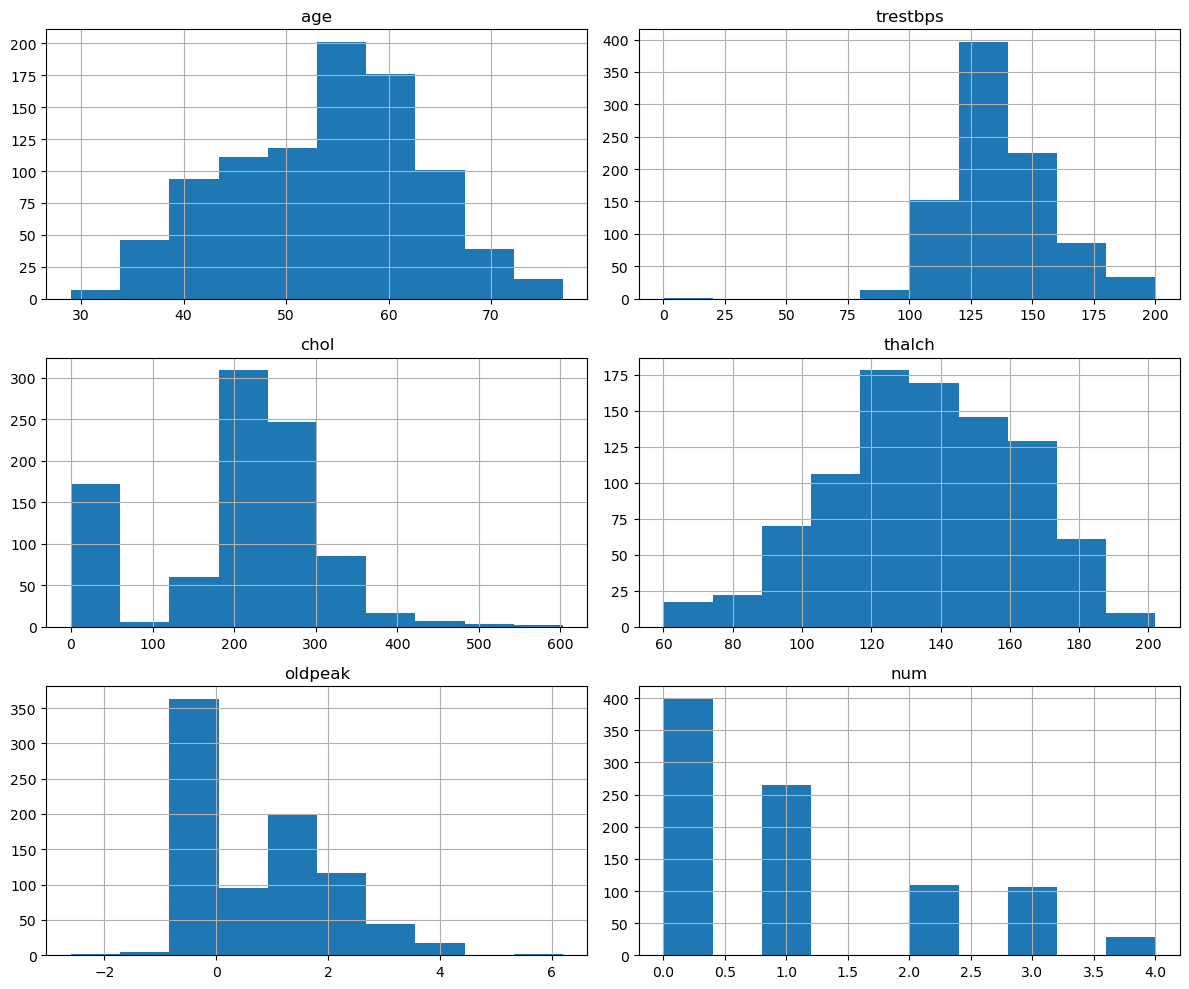

In [33]:
# Visualize distributions
print("\nVisualizing distributions...")
data.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()



Correlation Matrix:


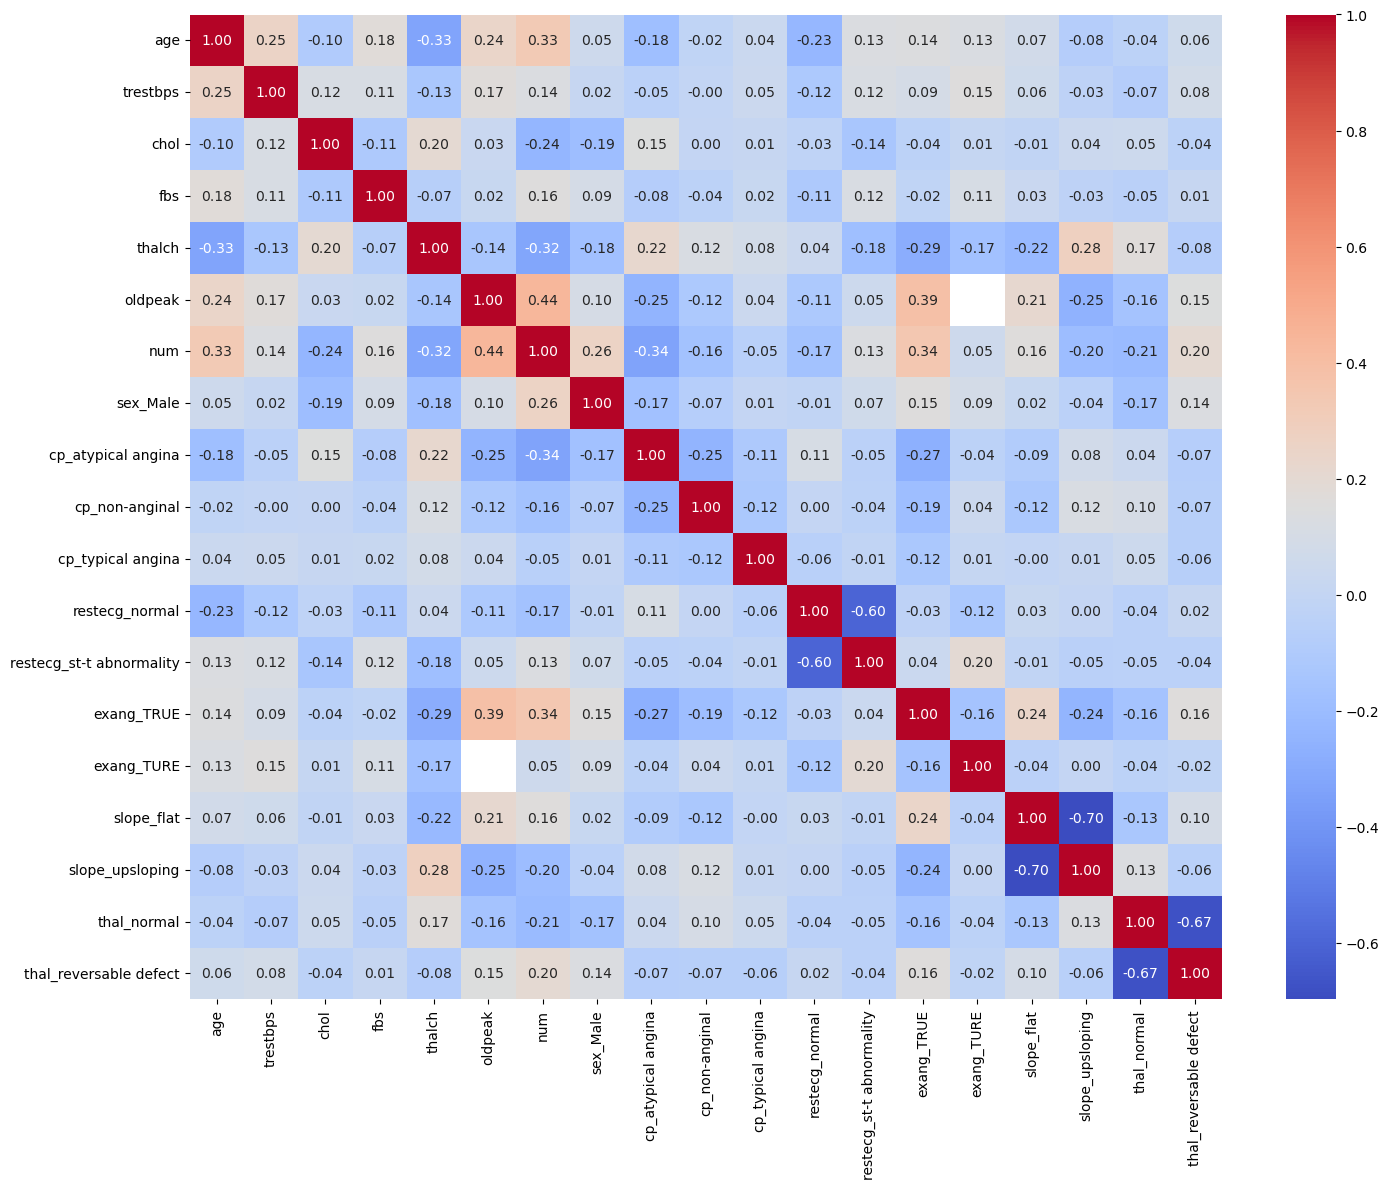

In [37]:
# Correlation Matrix
print("\nCorrelation Matrix:")
plt.figure(figsize=(15,12))
sns.heatmap(encoded_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.tight_layout()
plt.show()

## Step 3: Feature Engineering

In [61]:
# Assuming the target column is named 'target'. Modify it based on your dataset.
target_column = 'chol'
X = data.drop(columns=[target_column])  # Features
y = data[target_column]                # Target variable


In [63]:
# Define features (X) and target (y)
y = data[target_column]
X = data.drop(target_column, axis=1)

## Step 4: Decision Tree Classification

In [65]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
# Train Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [69]:
# Predict and evaluate
y_pred = model.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.59      0.53        27
         100       0.00      0.00      0.00         1
         126       0.00      0.00      0.00         1
         131       0.00      0.00      0.00         0
         139       0.00      0.00      0.00         1
         141       0.00      0.00      0.00         1
         147       0.00      0.00      0.00         1
         149       0.00      0.00      0.00         1
         160       0.00      0.00      0.00         2
         163       0.00      0.00      0.00         1
         164       0.00      0.00      0.00         0
         166       0.00      0.00      0.00         1
         167       0.00      0.00      0.00         0
         168       0.00      0.00      0.00         1
         170       0.00      0.00      0.00         1
         171       0.00      0.00      0.00         1
         175       0.00      0.00      0.00         0
  

C:\Users\Sonam Sherkar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Sonam Sherkar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Sonam Sherkar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Sonam Sherkar\a

## Step 5: Hyperparameter Tuning

In [71]:
# Define parameter grid
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10]
}


In [73]:
# Perform Grid Search
grid_search = GridSearchCV(estimator=model, param_grid=params, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

C:\Users\Sonam Sherkar\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [74]:
# Best parameters
print("\nBest Parameters:", grid_search.best_params_)


Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 2}


In [77]:
# Evaluate with best parameters
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
print("\nClassification Report (Best Model):\n", classification_report(y_test, y_pred_best))
print("Accuracy (Best Model):", accuracy_score(y_test, y_pred_best))



Classification Report (Best Model):
               precision    recall  f1-score   support

           0       0.24      0.85      0.37        27
         100       0.00      0.00      0.00         1
         109       0.00      0.00      0.00         0
         126       0.00      0.00      0.00         1
         139       0.00      0.00      0.00         1
         141       0.00      0.00      0.00         1
         147       0.20      1.00      0.33         1
         149       0.00      0.00      0.00         1
         160       0.00      0.00      0.00         2
         163       0.00      0.00      0.00         1
         166       0.00      0.00      0.00         1
         168       0.00      0.00      0.00         1
         170       0.00      0.00      0.00         1
         171       0.00      0.00      0.00         1
         177       0.00      0.00      0.00         1
         180       0.00      0.00      0.00         3
         182       0.00      0.00      0.00

C:\Users\Sonam Sherkar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Sonam Sherkar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Sonam Sherkar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Sonam Sherkar\a

## Step 6: Model Evaluation and Analysis

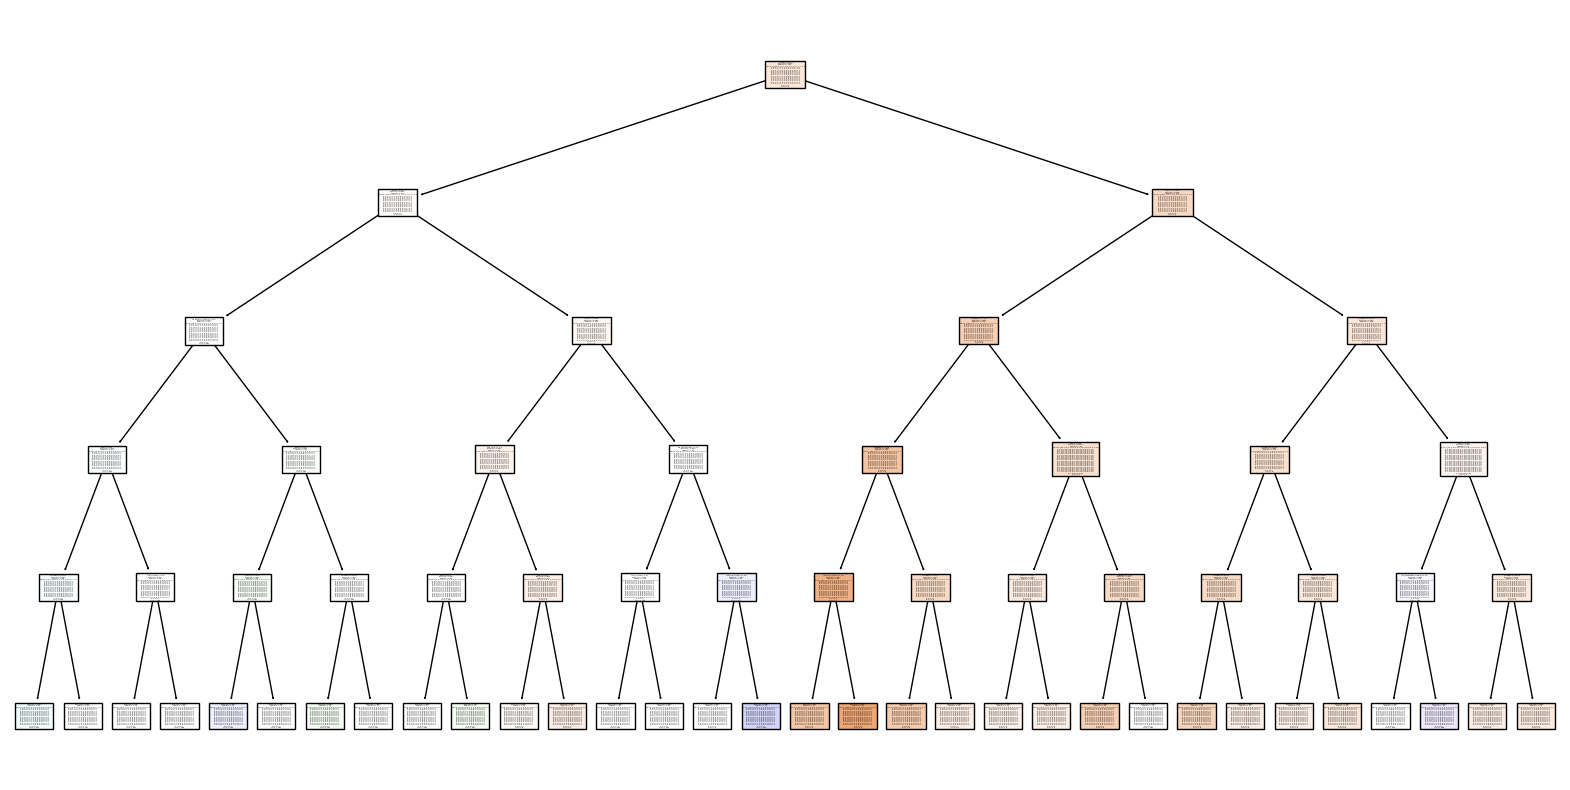

In [83]:
# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
class_names = [str(cls) for cls in best_model.classes_]
plot_tree(best_model, feature_names=X.columns, class_names=class_names, filled=True)
plt.show()

## Interview Questions

In [92]:
#. 1.What are some common hyperparameters of decision tree models, and how do they affect the model's performance?
#Common hyperparameters of decision tree models and their effects:
## max_depth: Limits the depth of the tree to prevent overfitting. Smaller values may underfit, while larger values may overfit.
## min_samples_split: Minimum number of samples required to split a node. Higher values reduce overfitting but may underfit.

## min_samples_leaf: Minimum number of samples in a leaf node. Larger values create more balanced trees and reduce overfitting.
#criterion: Metric for splitting (gini or entropy). Determines how splits are chosen to improve purity.

## max_features: Maximum number of features considered for a split. Helps control overfitting by limiting input dimensions.

## max_leaf_nodes: Limits the number of leaf nodes. Reduces complexity and controls overfitting.

#Each hyperparameter needs careful tuning to balance model bias and variance for optimal performance.

In [ ]:
## 2. What is the difference between the Label encoding and One-hot encoding?
#Label Encoding converts each unique category in a feature into a numeric label (e.g., A = 0, B = 1, C = 2). It is useful for ordinal data where the categories have an inherent order.

#One-Hot Encoding creates binary columns for each category, with a 1 indicating the presence of that category and 0 indicating its absence. It is used for nominal data where there is no inherent order between categories.






